In [8]:
import pandas as pd
df_wine = pd.read_csv('wine.data',header = None)
df_wine.columns=['Class label','Alcohol','Malic acid','ASh','Alcalinity of ash',
                 'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
                 'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines',
                  'Proline']
df_wine[:10]

,Class label,Alcohol,Malic acid,ASh,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [9]:
#drop 1 class
df_wine = df_wine[df_wine['Class label']!=1]
X = df_wine[['Alcohol','OD280/OD315 of diluted wines']].values
y=df_wine['Class label'].values 

In [10]:
X[1:5]

array([[12.33,  1.67],
       [12.64,  1.59],
       [13.67,  2.46],
       [12.37,  2.87]])

In [11]:
y[1:5]

array([2, 2, 2, 2], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [13]:
len(X_train)

95

In [14]:
len(X_test)

24

### <font color =#000000>Graph Method </font>

In [15]:
#劃分界的那條線 function plot_dscision_regions
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    #setup maker generator and color map
    markers=('s','x','o','^')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.3,cmap =cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],
                    y=X[y ==cl,1],
                   alpha = 0.8,
                   c=colors[idx],
                   marker = markers[idx],
                   label = cl,
                   edgecolor = 'black')
    #highlight test samples
    if test_idx:
        #plot all samples
        X_test,y_test = X[test_idx,:],y[test_idx]
        
        plt.scatter(X_test[:,0],
                    X_test[:,1],
                    c='',
                    edgecolor = 'black',
                    alpha = 1.0,
                    linewidth=1,
                    marker ='o',
                    s=100,
                    label = 'test set')
  

### <font color =#000000>XGBoost </font>

In [17]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)

print("train: %.5f"%(xgbc.score(X_train,y_train)))
print("tests: %.5f"%(xgbc.score(X_test,y_test)))

[16:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train: 0.97895
tests: 0.91667


[16:55:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


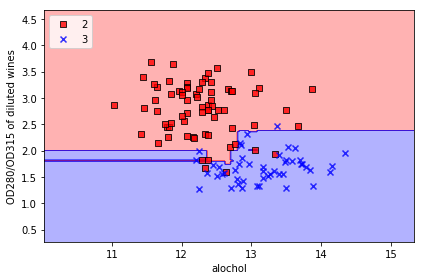

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from matplotlib.colors import ListedColormap

xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)

X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X_combined,y_combined,classifier=xgbc)

plt.xlabel('alochol')
plt.ylabel('OD280/OD315 of diluted wines')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()